In [8]:
# Import numpy, pandas for data manipulation
import numpy as np
import pandas as pd
from collections import Counter
import time

# Import plotly, matplotlib and seaborn as visualization tools
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
import seaborn as sns

# Import for resampling the data
from imblearn.over_sampling import SMOTE

# Import for scaling the data
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder

# Import machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

# Import model evaluation metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Plot should appear inside the jupyter notebook
%matplotlib inline

init_notebook_mode(connected=True)

In [9]:
# Loading the dataset
df = pd.read_csv("D:\B.Tech Project\Code\Indian-General-Elections-2019-Data-Analysis-And-Predictions-Using-Machine-Learning\data\LS_2.0.csv")
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\r\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\r\nVOTES,POSTAL\r\nVOTES,TOTAL\r\nVOTES,OVER TOTAL ELECTORS \r\nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \r\nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [10]:
df.replace({'Not Available': np.nan}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   STATE                                      2263 non-null   object 
 1   CONSTITUENCY                               2263 non-null   object 
 2   NAME                                       2263 non-null   object 
 3   WINNER                                     2263 non-null   int64  
 4   PARTY                                      2263 non-null   object 
 5   SYMBOL                                     2018 non-null   object 
 6   GENDER                                     2018 non-null   object 
 7   CRIMINAL
CASES                            1996 non-null   object 
 8   AGE                                        2018 non-null   float64
 9   CATEGORY                                   2018 non-null   object 
 10  EDUCATION                

In [12]:
df.columns = df.columns.str.replace('\r','')
df.columns = df.columns.str.replace('\n','')

In [13]:
df.describe()

,WINNER,AGE,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2263.000000,2018.000000,2.263000e+03,2263.000000,2.263000e+03,2263.000000,2263.000000,2.263000e+03
mean,0.238179,52.273538,2.615991e+05,990.710561,2.625898e+05,15.811412,23.190525,1.658016e+06
std,0.426064,11.869373,2.549906e+05,1602.839174,2.559822e+05,14.962861,21.564758,3.145187e+05
min,0.000000,25.000000,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,43.250000,2.103450e+04,57.000000,2.116250e+04,1.296518,1.899502,1.530014e+06
50%,0.000000,52.000000,1.539340e+05,316.000000,1.544890e+05,10.510553,16.221721,1.679030e+06
75%,0.000000,61.000000,4.858040e+05,1385.000000,4.872315e+05,29.468185,42.590233,1.816857e+06
max,1.000000,86.000000,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


In [14]:
# Checking to see if the dataset contains any null values. We need to exclude NOTA votes while checking it.
df = df[df['PARTY']!= 'NOTA']
df = df.dropna()
df.isna().sum()

STATE                                      0
CONSTITUENCY                               0
NAME                                       0
WINNER                                     0
PARTY                                      0
SYMBOL                                     0
GENDER                                     0
CRIMINALCASES                              0
AGE                                        0
CATEGORY                                   0
EDUCATION                                  0
ASSETS                                     0
LIABILITIES                                0
GENERALVOTES                               0
POSTALVOTES                                0
TOTALVOTES                                 0
OVER TOTAL ELECTORS IN CONSTITUENCY        0
OVER TOTAL VOTES POLLED IN CONSTITUENCY    0
TOTAL ELECTORS                             0
dtype: int64

In [15]:
df.head(10)

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\r\n ~ 30 Lacs+","Rs 2,31,450\r\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\r\n ~ 1 Crore+","Rs 8,47,000\r\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\r\n ~ 3 Crore+","Rs 1,53,00,000\r\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\r\n ~ 7 Crore+","Rs 86,06,522\r\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\r\n ~ 13 Crore+","Rs 2,22,51,891\r\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54.0,SC,Post Graduate,"Rs 5,50,75,753\r\n ~ 5 Crore+",Rs 0\r\n ~,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37.0,GENERAL,Doctorate,"Rs 16,86,64,576\r\n ~ 16 Crore+","Rs 26,23,964\r\n ~ 26 Lacs+",696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34.0,GENERAL,Graduate,"Rs 9,44,88,381\r\n ~ 9 Crore+","Rs 3,25,49,132\r\n ~ 3 Crore+",419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62.0,GENERAL,Graduate,"Rs 1,39,49,000\r\n ~ 1 Crore+","Rs 14,00,000\r\n ~ 14 Lacs+",31644,163,31807,1.708771,2.637200,1861396
10,Gujarat,AHMEDABAD EAST,Patel Hasmukhbhai Somabhai,1,BJP,Lotus,MALE,0,58.0,GENERAL,Others,"Rs 7,46,99,690\r\n ~ 7 Crore+","Rs 62,52,577\r\n ~ 62 Lacs+",745810,4024,749834,41.384970,67.005462,1811851


In [16]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINALCASES                               object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [17]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['ASSETS'] = df['ASSETS'].apply((value_cleaner))
df['LIABILITIES'] = df['LIABILITIES'].apply((value_cleaner))

In [18]:
df['EDUCATION'].value_counts()

EDUCATION
Post Graduate            502
Graduate                 441
Graduate Professional    336
12th Pass                256
10th Pass                196
8th Pass                  78
Doctorate                 73
Others                    50
Literate                  30
5th Pass                  28
Illiterate                 5
Post Graduate\r\n          1
Name: count, dtype: int64

In [19]:
# Removing the \n from 'Post Graduate\n'
df['EDUCATION'].replace(to_replace='Post Graduate\r\n', value='Post Graduate', inplace=True)

# 'Graduate Professional' are Graduates, so replacing 'Graduate Professional' with 'Graduate'
df['EDUCATION'].replace(to_replace='Graduate Professional', value='Graduate', inplace=True)

# 'Literate' = 8th Pass in our society
df['EDUCATION'].replace(to_replace='Literate', value='8th Pass', inplace=True)

# Any education level below 8th pass is illiterate
df['EDUCATION'].replace(to_replace='5th Pass', value='Illiterate', inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15840\3051446079.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Hp\AppData\Local\Temp\ipykernel_15840\3051446079.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [20]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


In [21]:
df.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINALCASES                               object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERALVOTES                                 int64
POSTALVOTES                                  int64
TOTALVOTES                                   int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

In [22]:
df['CRIMINALCASES'] = df['CRIMINALCASES'].astype(int, errors='raise')
df['ASSETS'] = df['ASSETS'].astype(float, errors='raise')
df['LIABILITIES'] = df['LIABILITIES'].astype(float, errors='raise')

In [23]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690


In [24]:
state_df = df[['STATE','CONSTITUENCY','TOTAL ELECTORS']]
state_fig = px.sunburst(state_df, 
                        path=['STATE','CONSTITUENCY'], 
                        values='TOTAL ELECTORS',
                        color='TOTAL ELECTORS',
                        color_continuous_scale='Oryel')
state_fig.update_layout(title_text='State and Constituency by total electors',
                       font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
state_fig.show()

In [25]:
# Number of seats won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
result_df = pd.DataFrame(data=result).sort_values(by="WINNER", ascending=False)
result_df.reset_index(level=0, inplace=True)

# Visualize the party-wise election results
result_fig = px.bar(result_df, 
                    x=result_df['PARTY'][:20], 
                    y=result_df["WINNER"][:20], 
                    color=result_df['WINNER'][:20], 
                    height=500,
                    color_continuous_scale='Oryel')
result_fig.update_layout(title_text='Top 20 Party-wise election results',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Seats")
result_fig.show()

In [26]:
# Create a dataframe with total number of votes won by each party
result = df[df['WINNER'] == 1].groupby('PARTY')['WINNER'].size()
vote_Share = df.groupby('PARTY')['TOTALVOTES'].sum()
vote_Share_df = pd.DataFrame(data=vote_Share, index=vote_Share.index).sort_values(by="TOTALVOTES", ascending=False)
vote_Share_df.reset_index(level=0, inplace=True)

# Sort out the top five parties according to the total number of votes
vote_share_top5 = df.groupby('PARTY')['TOTALVOTES'].sum().nlargest(5).index.tolist()

# Create a method to label parties as 'Other' if they are not top five in total number of votes.
def sort_party(data):
    '''
    Method to label parties as 'Other' if they are not top five in total number of votes.
    data: input rows
    '''
    if data['PARTY'] not in vote_share_top5:
        return 'Other'
    else:
        return data['PARTY']

# Calling the method
df['Party New'] = df.apply(sort_party, axis=1)

# Visualize Party-wise vote share
vote_count = df.groupby('Party New')['TOTALVOTES'].sum()
vote_count_fig = go.Figure(go.Pie(labels=vote_count.index, 
                                  values=vote_count.values,
                                  pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                                  marker=dict(line=dict(color="#000000", 
                                                        width=2))))
vote_count_fig.update_layout(title_text='Party-wise Vote Share',
                             font_family="Courier New",
                             font_color="#351f39",
                             title_font_family="Courier New",
                             title_font_color="#351f39")
vote_count_fig.show()

In [27]:
df['Party New'].value_counts()

Party New
Other    918
BJP      420
INC      411
BSP      161
AITC      47
SP        39
Name: count, dtype: int64

In [28]:
# Visualize the age distribution of candidates
age_distribution_fig = px.histogram(df, 
                                    x="AGE",
                                    color_discrete_sequence=['indianred'])
age_distribution_fig.update_layout(title_text='Age Distribution of Candidates',
                                   xaxis_title="Distribution",
                                   yaxis_title="Age")
age_distribution_fig.update_layout(font_family="Courier New",
                                   font_color="#351f39",
                                   title_font_family="Courier New",
                                   title_font_color="#351f39")
age_distribution_fig.show()

In [29]:
# Create a dataframe containing the caste distribution of winners
winner_caste = df[df['WINNER'] == 1].groupby('CATEGORY')['WINNER'].size()
winner_caste_df = pd.DataFrame(data=winner_caste)
winner_caste_df.reset_index(level=0, inplace=True)
winner_caste_df['Category'] = 'Winner'

# Create a dataframe containing the caste distribution of total number of candidates
total_caste = df.groupby('CATEGORY').size()
total_caste_df = pd.DataFrame(data=total_caste)
total_caste_df.reset_index(level=0, inplace=True)
total_caste_df['Category'] = 'Total'
total_caste_df.rename(columns={0: "WINNER"}, inplace=True)

# Concatenate the two dataframes
winner_caste_df = pd.concat((winner_caste_df, total_caste_df))

# Visualize the results
caste_fig = px.bar(winner_caste_df, 
                   x='CATEGORY', 
                   y='WINNER',
                   color='Category', 
                   barmode='group')
caste_fig.update_layout(font_family="Courier New",
                        font_color="#351f39",
                        title_text='Caste distribution of candidates',
                        title_font_family="Courier New",
                        title_font_color="#351f39",
                        xaxis_title='Caste',
                        yaxis_title='Count')
caste_fig.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [30]:
# Create a dataframe of criminal records
criminal_df = pd.DataFrame(data=df[df['WINNER'] == 1].groupby('PARTY')['CRIMINALCASES'].sum())
criminal_df.sort_values(by='CRIMINALCASES', ascending=False, inplace=True)
criminal_df.reset_index(level=0, inplace=True)
criminal_df

# Visualize the criminal records
criminal_fig = px.scatter(criminal_df[:10], 
                 x='PARTY', 
                 y='CRIMINALCASES', 
                 size='CRIMINALCASES',
                 color='PARTY',
                 hover_data=['CRIMINALCASES'])

criminal_fig.update_layout(title_text='Top 10 Party-wise criminal records',
                         font_family="Courier New",
                         font_color="#351f39",
                         title_font_family="Courier New",
                         title_font_color="#351f39",
                         xaxis_title="Party",
                         yaxis_title="Criminal Records")

criminal_fig.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [35]:
# This is the dataset which will be used for fitting Machine Learning models
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERALVOTES,POSTALVOTES,TOTALVOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,Party New
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,376892,482,377374,25.330684,35.468248,1489790,BJP
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,318665,149,318814,21.399929,29.964370,1489790,Other
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,314057,181,314238,21.092771,29.534285,1489790,INC
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,644459,2416,646875,33.383823,56.464615,1937690,BJP
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,434199,1130,435329,22.466390,37.999125,1937690,BSP


In [36]:
# Labeling parties with less than 10 candidates as others
less_candidates = []
for i, j in df['PARTY'].value_counts().items():
    if j <= 10:
        less_candidates.append(i)
len(less_candidates)

def small_party(data):
    if data in less_candidates:
        return 'Other'
    return data
df['PARTY'] = df['PARTY'].apply(small_party)
df['PARTY'].value_counts()

PARTY
BJP       420
INC       411
Other     247
IND       193
BSP       161
CPI(M)    100
VBA        47
AITC       47
SP         39
MNM        35
NTK        34
SHS        26
AAP        25
TDP        25
YSRCP      25
DMK        23
NCP        21
AIADMK     21
RJD        21
BJD        21
JnP        19
JD(U)      18
TRS        17
Name: count, dtype: int64

In [37]:
X = df.drop(['NAME', 'SYMBOL', 'WINNER', 'GENERALVOTES', 'POSTALVOTES', 'TOTALVOTES', 'OVER TOTAL ELECTORS IN CONSTITUENCY', 
             'OVER TOTAL VOTES POLLED IN CONSTITUENCY', 'Party New', 'CONSTITUENCY'], axis=1)
y = df['WINNER']
X.head()

,STATE,PARTY,GENDER,CRIMINALCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL ELECTORS
0,Telangana,BJP,MALE,52,52.0,ST,12th Pass,3099414.0,231450.0,1489790
1,Telangana,TRS,MALE,0,54.0,ST,Post Graduate,18477888.0,847000.0,1489790
2,Telangana,INC,MALE,3,52.0,ST,12th Pass,36491000.0,15300000.0,1489790
4,Uttar Pradesh,BJP,MALE,5,58.0,SC,Doctorate,74274036.0,8606522.0,1937690
5,Uttar Pradesh,BSP,MALE,0,47.0,SC,Post Graduate,133784385.0,22251891.0,1937690


In [38]:
# Creating training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
categorical = []
numerical = []

# Converting Strings to Category
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype("category")
        categorical.append(label)

    if pd.api.types.is_numeric_dtype(content):
        numerical.append(label)

In [40]:
# Initializing the StandardScaler()
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

# Encoding the categorical columns
for cat in categorical:
    label_fit = encoder.fit(np.array(X[cat]).reshape(-1, 1))
    X_train[cat] = label_fit.transform(np.array(X_train[cat]).reshape(-1, 1))
    X_test[cat] = label_fit.transform(np.array(X_test[cat]).reshape(-1, 1))
    
# Scaling the dataset
scaler_fit = scaler.fit(X[numerical])
X_train[numerical] = scaler_fit.transform(X_train[numerical])
X_test[numerical] = scaler_fit.transform(X_test[numerical])

In [41]:
# Encoding the target
target_enc = LabelEncoder().fit(y_train)
y_train = target_enc.transform(y_train)
y_test = target_enc.transform(y_test)

In [42]:
Counter(y_train)

Counter({0: 1015, 1: 382})

In [43]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({1: 1015, 0: 1015})


In [44]:
np.random.seed(42)

# Create a dictionary of the models to experiment
models = {
          "Random Forest" : RandomForestClassifier(n_jobs=-1),
          "Support Vector Machines" : SVC(),
          "K-Nearest Neighbors" : KNeighborsClassifier(),
          "Logistic Regression"  : LogisticRegression(),
          "XG Boosting" : xgb.XGBClassifier(n_jobs=-1),
          "Cat Boosting": CatBoostClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier(),
          "ADA Boosting" : AdaBoostClassifier(),
          "LG Boosting" : lgb.LGBMClassifier(),
          "Decision Trees" : DecisionTreeClassifier()
         }

# Create a function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    '''
    Fits and evaluates the machine learning models.
    models : a dict of different Scikit-Learn machine learning models.
    X_train : training data (no labels)
    y_train : training lables
    X_test : testing data (no labels)
    y_test : testing lables
    '''
    train_model_scores_acc = {}
    train_model_scores_pre = {}
    train_model_scores_rec = {}
    train_model_scores_f1 = {}
    
    test_model_scores_acc = {}
    test_model_scores_pre = {}
    test_model_scores_rec = {}
    test_model_scores_f1 = {}
    
    train_model_timing = {}
    
    for name, model in models.items():
        start = time.time()
        train_model_scores_acc[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')) * 100
        train_model_scores_pre[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='precision')) * 100
        train_model_scores_rec[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='recall')) * 100
        train_model_scores_f1[name] = np.mean(cross_val_score(model, X_train, y_train, cv=10, n_jobs=-1, scoring='f1')) * 100
        stop = time.time()
        timing = stop - start
        train_model_timing[name] = timing
        
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        test_model_scores_acc[name] = accuracy_score(y_test, pred) * 100
        test_model_scores_pre[name] = precision_score(y_test, pred) * 100
        test_model_scores_rec[name] = recall_score(y_test, pred) * 100
        test_model_scores_f1[name] = f1_score(y_test, pred) * 100
        
    # Create dictionary for oil scores
    scores = {'Training Accuracy': train_model_scores_acc,
              'Training Precision': train_model_scores_pre,
              'Training Recall': train_model_scores_rec,
              'Training F1': train_model_scores_f1,
              'Test Accuracy':  test_model_scores_acc,
              'Test Precision': test_model_scores_pre,
              'Test Recall': test_model_scores_rec,
              'Test F1': test_model_scores_f1,
              '10-Fold CV Timing (seconds)': train_model_timing
             }

    # Create dataframe of scores
    scores_df = pd.DataFrame(scores)

    scores_df.rename_axis('Model', inplace=True)
    scores_df.reset_index(inplace=True)
    scores_df.sort_values('Test Accuracy', ascending=False, inplace=True)
    return scores_df

In [45]:
score_df = fit_and_score(models, X_train, y_train, X_test, y_test)

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning:


2 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more 

Learning rate set to 0.013939
0:	learn: 0.6852326	total: 95.5ms	remaining: 1m 35s
1:	learn: 0.6771533	total: 103ms	remaining: 51.5s
2:	learn: 0.6704284	total: 111ms	remaining: 37s
3:	learn: 0.6632001	total: 118ms	remaining: 29.5s
4:	learn: 0.6547194	total: 126ms	remaining: 25.1s
5:	learn: 0.6482203	total: 133ms	remaining: 22s
6:	learn: 0.6413125	total: 141ms	remaining: 20s
7:	learn: 0.6341504	total: 148ms	remaining: 18.3s
8:	learn: 0.6283418	total: 156ms	remaining: 17.2s
9:	learn: 0.6225855	total: 164ms	remaining: 16.2s
10:	learn: 0.6173702	total: 172ms	remaining: 15.5s
11:	learn: 0.6130043	total: 179ms	remaining: 14.7s
12:	learn: 0.6069781	total: 187ms	remaining: 14.2s
13:	learn: 0.6025557	total: 194ms	remaining: 13.7s
14:	learn: 0.5980250	total: 201ms	remaining: 13.2s
15:	learn: 0.5932456	total: 208ms	remaining: 12.8s
16:	learn: 0.5882929	total: 215ms	remaining: 12.4s
17:	learn: 0.5840444	total: 222ms	remaining: 12.1s
18:	learn: 0.5781927	total: 229ms	remaining: 11.8s
19:	learn: 0.57

In [46]:
score_df

,Model,Training Accuracy,Training Precision,Training Recall,Training F1,Test Accuracy,Test Precision,Test Recall,Test F1,10-Fold CV Timing (seconds)
0,Random Forest,88.620690,88.501165,87.234518,88.118014,86.477462,75.000000,72.611465,73.786408,22.078050
4,XG Boosting,88.669951,88.556571,88.816735,88.308415,86.310518,75.510204,70.700637,73.026316,3.741716
8,LG Boosting,88.669951,88.448549,89.304019,88.456955,86.143573,73.417722,73.885350,73.650794,10.462875
5,Cat Boosting,NaN,88.825299,89.205979,88.580473,85.976628,73.248408,73.248408,73.248408,149.181539
6,Gradient Boosting,86.502463,87.668297,85.256261,86.088718,85.976628,72.121212,75.796178,73.913043,10.993851
7,ADA Boosting,79.310345,83.517410,73.129489,77.750937,83.806344,70.833333,64.968153,67.774086,3.826760
2,K-Nearest Neighbors,84.039409,80.570713,89.856339,84.905673,82.971619,63.285024,83.439490,71.978022,0.823149
9,Decision Trees,83.940887,84.111088,84.077849,83.814721,82.303840,64.571429,71.974522,68.072289,0.473471
1,Support Vector Machines,66.650246,66.829493,66.099786,66.393077,70.784641,46.456693,75.159236,57.420925,4.459060
3,Logistic Regression,63.546798,62.487034,67.679091,64.916437,61.769616,37.837838,71.337580,49.448124,1.086406


In [47]:
# Fitting the final model
final_model = xgb.XGBClassifier(n_jobs=-1)
final_model.fit(X_train, y_train)

# Making predictions
pred = final_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

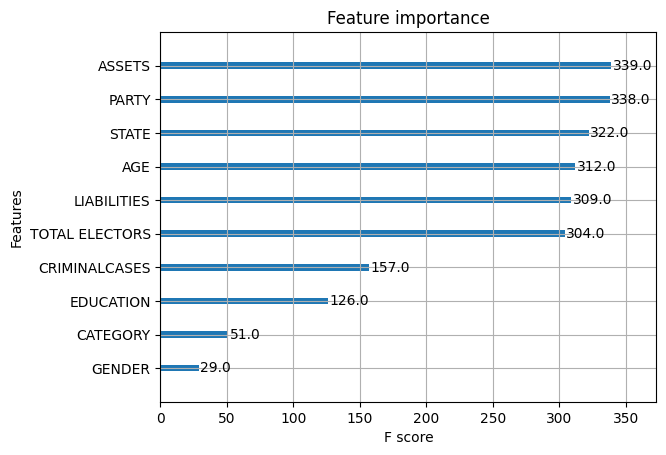

In [48]:
xgb.plot_importance(final_model)

In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       442
           1       0.76      0.71      0.73       157

    accuracy                           0.86       599
   macro avg       0.83      0.81      0.82       599
weighted avg       0.86      0.86      0.86       599



<Axes: >

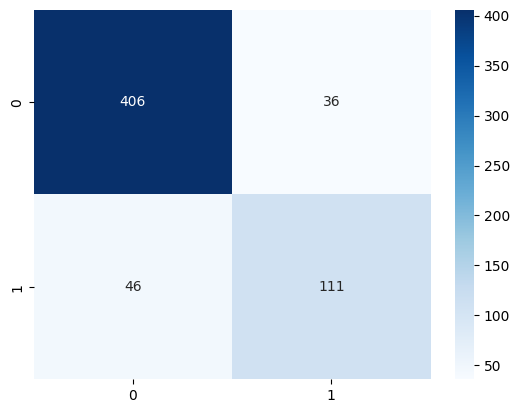

In [50]:
sns.heatmap(confusion_matrix(y_test, pred), cmap= "Blues", annot=True, fmt='')